# Q-Learning in Reinforcement Learning

Q-Learning a simple but important algorithms to learn reinforcement learning.

In order to understand how it works, first let's consider the expected rewards as follows.

$$ R = \sum_{t=0}^{\infty} {\gamma^t r_t} $$

where $r_t$ is a reward value obtained at $t$ and $\gamma$ is discount.

For instance, when you try to grab an object, you will do the following 3 actions :

- action #1 : Stretch your arm ($t=0$)<br>
  Getting reward 0.
- action #2 : Open your hand ($t=1$)<br>
  Getting reward 0.
- action #3 : Grab an object ($t=2$)<br>
  Getting reward 10.

In this case, you will get a reward value 10 on action #3 ($t=2$), however the action #1 ($t=0$) is obviously contributing to the final rewards. Hence, we consider that the action #1 will have the following expected cumulative reward.<br>
Here we assume $\gamma$ is 0.99.

$$ R_{t=0} = 0 + 0.99 \times 0 + 0.99^2 \times 10 = 9.801 $$

Same as above, $R_{t=1} = 9.9, R_{t=2} = 10$.

Q-value is based on this idea of expected cumulative reward. Depending on each state (observation), each action will have the corresponding expected reward.<br>
In above example, if you see an object in front of you (i.e, the **state** of "you see an object"), the **action** "stretching your arm" will have high value of expected reward. However, if you cannot see an object anywhere, the action "stretching your arm" will have low value of expected reward.

Q-value of each corresponding state and action is denoted as $Q(s, a)$. Suppose both action and state has 1 dimension of discrete values, $Q(s, a)$ will be written as a table (called Q-Table) as follows.<br>
If the state is s2, the optimal action to pick up will be action a2. If s3, the optimal action will be action a4.

![Q-Table](assets/q-table.png)

In practice, both action space and observation space may have more than 1 dimension. Then Q-Table will be the combination of 1 dimension (action space) and 4 dimension (observation space).

In Q-Learning, we optimize this table by the following iterative updates ($t=0,1,2,\ldots$).<br>
In the following equation, $ Q_t(s_t,a_t) $ is current Q-value and $ Q_{t+1}(s_t,a_t) $ is the updated Q-value.

$$ Q_{t+1}(s_t,a_t) = Q_t(s_t,a_t) + \alpha \left( r_t + \gamma \max_a{Q_t(s_{t+1},a)} - Q_t(s_t,a_t) \right) $$

where $\alpha$ is learning rate.

This equation means that :

- Suppose, you executed an action $a_t$ on state $s_t$, and as a result, you got reward $r_t$ and the state has changed to $s_{t+1}$.
- The optimal next action will satisfy $a_{t+1}=\max_{a}{Q(s_{t+1},a)}$.<br>
  By taking this optimal action, you will then get the expected reward : $r_t + \gamma \max_{a}{Q(s_{t+1},a)}$.
- Compare this optimal q-value with current q-value $Q(s_t,a_t)$ in q-table. Then update this current value $Q(s_t,a_t)$ by learning rate $\alpha$.<br>
  This will result into above equation.

We will try q-learning with the frozen lake Environment from the gym library. 


In [2]:
import gymnasium as gym
import numpy as np
from random import randint
import typing as tt
import matplotlib.pyplot as plt

## Frozen lake environment
Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

![FrozenLake](../assets/frozen_lake.gif)

### Action Space
The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:

### Observation Space
The observation is a value representing the agent’s current position as current_row * nrows + current_col (where both the row and col start at 0). For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map. For example, the 4x4 map has 16 possible observations.

# Let's play arround with the environment!

In [4]:
env = gym.make("FrozenLake-v1", render_mode='human')
observation = env.reset() 

In [5]:

# env.action_space => Discrete(4) => 0=left, 1=down, 2=right, 3=up
# env.observation_space => Discrete(16) => numbered 4x4 box

pathlist = []
for _ in range(100): # 100 genügend Suchsteps
  env.render() # Zeige das Environment und meine Position an
  # Hier macht evtl. ein time.sleep(0.5) Sinn, um die Steps zu sehen
  # action = env.action_space.sample() # type(action) => <class 'int'>
  action = randint(1,2) # Wir fahren hier mal die runter/rechts Strategie
  pathlist.append(action) # Aktion merken
  observation, reward, done, info, _ = env.step(action) 
  # observation = 0-15 pos, reward = 0.0 or 1.0, done = true / false, info=prob=0.333
  print("Observation=", observation, "Reward=", reward, "Done=", done)
  if reward > 0.0:
    print("GEWINNPFAD: ", pathlist, ", LEN = " , len(pathlist))
    break;

  if done:
    print("TERMINIERT!")
    break

env.render()
observation = env.reset() # shut down


Observation= 4 Reward= 0.0 Done= False
Observation= 5 Reward= 0.0 Done= True
TERMINIERT!


In [134]:
env.close()

# Now, Lets take a look at Q-learning with tabular learning

Tasks

1. Creaate the Q-Table
2. Implement a Q-learning algirithm for the Frozen Lake environment. Evaluate your results  

In [ ]:
# 1. Creaate the Q-Table
q_table = np.zeros((env.observation_space.n,env.action_space.n))


In [10]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [17]:
# 2. Implement a Q-learning algorithm for the Frozen Lake environment. Evaluate your results  


gamma = 0.9
alpha = 0.5


# pick up action from q-table
def pick_sample(s):
    if np.max(q_table[s]) > 0:
        a = np.argmax(q_table[s])
    else:
        a = env.action_space.sample()
    return a

env = gym.make("FrozenLake-v1") # is_slippery=False, render_mode='human'
q_table = np.zeros((env.observation_space.n,env.action_space.n))
#Q-Table befor Training
print(q_table)
outcomes = []
reward_records = []
for i in range(1000):
    # Run episode till done
    done = False
    total_reward = 0
    s, _ = env.reset()
    
           
    while not done:
        a = pick_sample(s)
        s_new, r, term, trunc, _ = env.step(a)
        done = term or trunc
        
        # Update Q-Table
        maxQ = np.max(q_table[s_new])
        q_table[(s)][a] = q_table[(s)][a] + alpha * (r + gamma * maxQ - q_table[s][a])
        
        total_reward += r
        s = s_new

   
    # Record total rewards in episode (max 500)
    print("Run episode{} with rewards {}".format(i, total_reward), end="\r")
    reward_records.append(total_reward)

print("\nDone")
env.close()
#Q-Table after training
print(q_table)
env.close()

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Run episode999 with rewards 0.0
Done
[[0.         0.01529506 0.         0.        ]
 [0.         0.00576006 0.         0.        ]
 [0.         0.01009688 0.         0.        ]
 [0.         0.01768656 0.         0.        ]
 [0.080201   0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.0088827  0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.08606077]
 [0.         0.0898157  0.         0.        ]
 [0.         0.         0.30226722 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.24570423 0.         0.        ]
 [0.         0.70176138 0.         0.        ]
 [0.         0.  

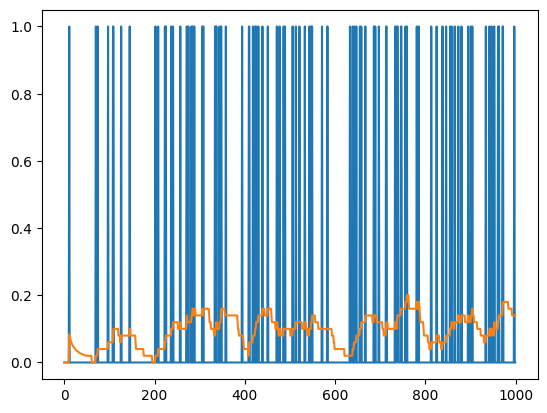

In [18]:
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(reward_records)
plt.plot(average_reward)

In [19]:
# Evaluate the learned Policy wwith 100 Episodes

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    s, _ = env.reset()
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(q_table[s]) > 0:
          a = np.argmax(q_table[s])

        # If there's no best action (only zeros), take a random one
        else:
          a = env.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        s_new, r, term, trunc, _  = env.step(a)
        done = term or trunc
        # Update our current state
        s = s_new

        # When we get a reward, it means we solved the game
        nb_success += r

# Evaluation
# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")


Success rate = 15.0%


# Epsilon-Greedy algorithm

With the previos approach the agent always chooses the action with the highest value. So, whenever a state-action pair starts having a non-zero value, the agent will always choose it. The other actions will never be taken, which means we’ll never update their value… But what if one of these actions was better than the one the agent always takes? Shouldn’t we encourage the agent to try new things from time to time and see if it can improve?
In other words, we want to allow our agent to either:

- Take the action with the highest value (exploitation);
- Choose a random action to try to find even better ones (exploration).
![Epsilon Greedy](assets/epsilon_greedy.gif)


## Excercise 2

1. Adjust the pick_sample function such that we have an epsilon-greedy algorithm
2. Evaluate the training results and compare to the plain Q-learning approach 



In [20]:
q_table = np.zeros((env.observation_space.n,env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [128]:
episodes = 4000       # Total number of episodes
alpha = 0.2            # Learning rate
gamma = 0.99            # Discount factor
epsilon = 1.5          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease


def pick_sample(s, epsilon):
    # get optimal action,
    # but with greedy exploration (to prevent picking up same values in the first stage)
    if np.random.random() > epsilon:
        a = np.argmax(q_table[s])
    else:
        a = np.random.randint(0, env.action_space.n)
    return a
env = gym.make("FrozenLake-v1") # is_slippery=False, render_mode='human'
q_table = np.zeros((env.observation_space.n,env.action_space.n))
print(q_table)
reward_records = []
for i in range(episodes):
    done = False
    total_reward = 0
    s, _ = env.reset()
    
   
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        a = pick_sample(s, epsilon)
        s_new, r, term, trunc, _ = env.step(a)
        done = term or trunc

       
        # Update Q-Table
        # Update Q-Table
        maxQ = np.max(q_table[s_new])
        q_table[(s)][a] = q_table[(s)][a] + alpha * (r + gamma * maxQ - q_table[s][a])
        
        total_reward += r
        s = s_new

    print("Run episode{} with rewards {}".format(i, total_reward), end="\r")
    reward_records.append(total_reward)

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [132]:
np.random.random()

0.6472037258819592

In [133]:
print(q_table)

[[0.57531114 0.43153931 0.43186465 0.42967835]
 [0.19873352 0.26711142 0.12206274 0.52290428]
 [0.35403138 0.27162998 0.34690735 0.50870699]
 [0.22186122 0.19082538 0.17510488 0.49315125]
 [0.59647728 0.40304013 0.41691274 0.23395693]
 [0.         0.         0.         0.        ]
 [0.23785902 0.03921503 0.08455043 0.08900076]
 [0.         0.         0.         0.        ]
 [0.29369535 0.41664082 0.40149408 0.62973112]
 [0.43063286 0.68471723 0.46052266 0.31636864]
 [0.63698938 0.34537366 0.19890187 0.34406347]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.488064   0.52954234 0.76587426 0.46082231]
 [0.60950836 0.87651071 0.63003983 0.60937901]
 [0.         0.         0.         0.        ]]


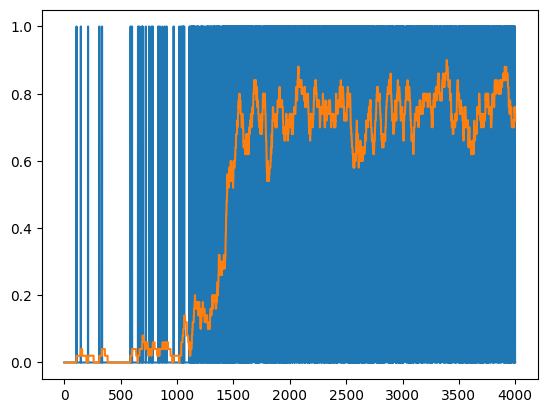

In [130]:
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(reward_records)
plt.plot(average_reward)


In [131]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    s, _ = env.reset()
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(q_table[s]) > 0:
          a = np.argmax(q_table[s])

        # If there's no best action (only zeros), take a random one
        else:
          a = env.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        s_new, r, term, trunc, _  = env.step(a)
        done = term or trunc
        # Update our current state
        s = s_new

        # When we get a reward, it means we solved the game
        nb_success += r

# Evaluation
# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 75.0%


In [40]:
env.close()

Let's take a look

In [138]:
env = gym.make("FrozenLake-v1", render_mode='human')
observation = env.reset() 

In [63]:

s, _ = env.reset()
done = False

# Until the agent gets stuck or reaches the goal, keep training it
while not done:
    # Choose the action with the highest value in the current state
    if np.max(q_table[s]) > 0:
        a = np.argmax(q_table[s])

    # If there's no best action (only zeros), take a random one
    else:
        a = env.action_space.sample()
            
    # Implement this action and move the agent in the desired direction
    s_new, r, term, trunc, _  = env.step(a)
    done = term or trunc
    # Update our current state
    s = s_new



In [141]:
env.close()